In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
#Load Cleaned Dataset
df = pd.read_csv("D:\Omar\Projects\Ai\Sprints\Heart_Disease_Project\data\cleaned_heart.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (303, 21)


<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\omara\AppData\Local\Temp\ipykernel_17816\2128107134.py:2: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_csv("D:\Omar\Projects\Ai\Sprints\Heart_Disease_Project\data\cleaned_heart.csv")


,age,trestbps,chol,thalach,oldpeak,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [4]:
# Separate Features and Target
X = df.drop("target", axis=1)
y = df["target"]

In [5]:
#Standardize Features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("PCA-transformed shape:", X_pca.shape)

Original shape: (303, 20)
PCA-transformed shape: (303, 20)


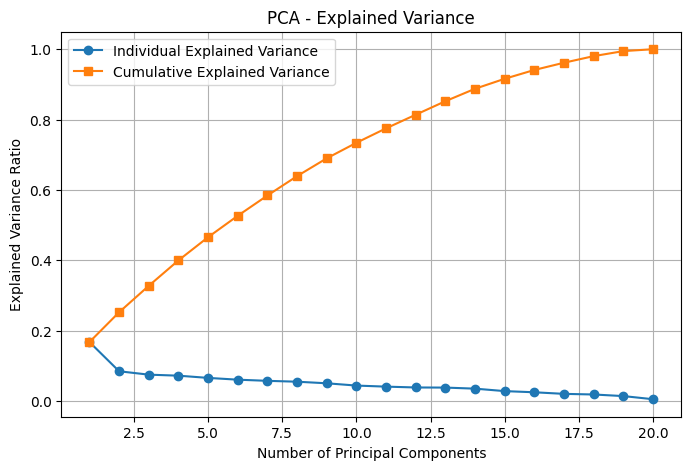

In [7]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label="Individual Explained Variance")
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='s', label="Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA - Explained Variance")
plt.legend()
plt.grid(True)
plt.show()


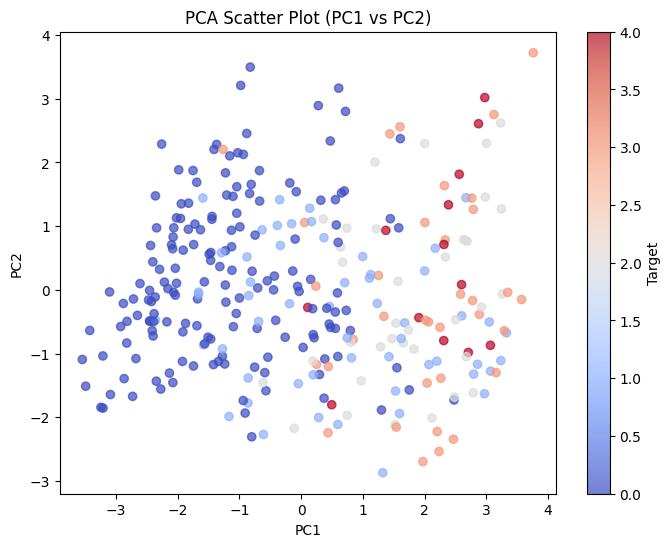

In [8]:
#Scatter Plot (first 2 components)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Target")
plt.show()


In [9]:
#Deliverable
print("PCA-transformed dataset ready")
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["target"] = y
pca_df.to_csv("pca_transformed.csv", index=False)
print("Saved as pca_transformed.csv")


PCA-transformed dataset ready
Saved as pca_transformed.csv
